# MLP, CNN 이해

- MNIST 이미지 인식
- GPU를 사용하려면 colab에서 실행

# import

In [2]:
# 아래는 한번만 설치하면 됨
# !pip install tensorflow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models

# MNIST 데이터

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

## 이미지 데이터 보기

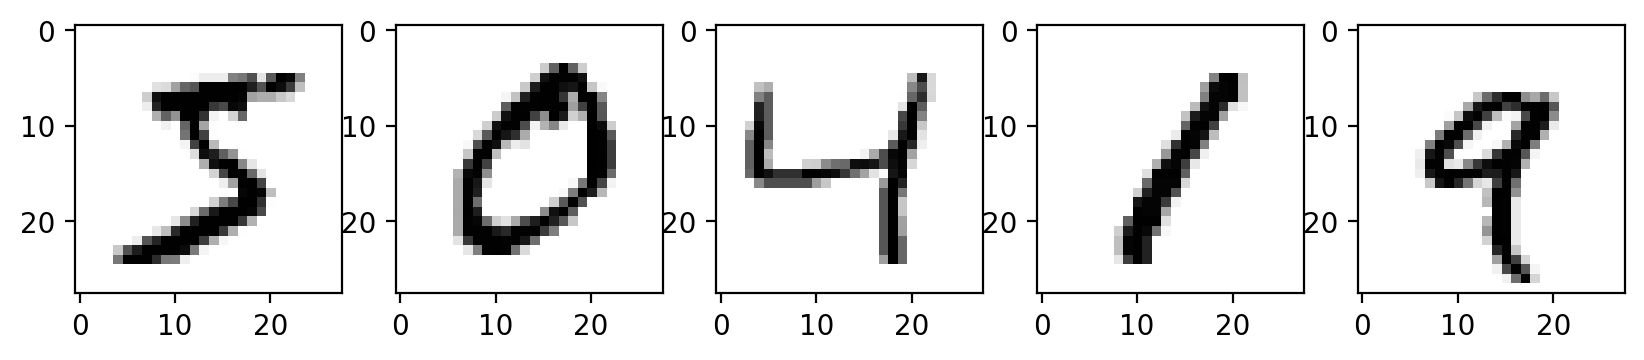

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [10]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# MLP 모델

- [MLP 동작 이해(playground)](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.30687&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
- [MLP로 구현한 MNIST 인식 모델](https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project/notebook)
- 출력단은 10개의 점수를 얻은 후에 소프트맥스를 수행하여 확률을 예측했다
  - 10개의 클래스 확률을 얻었다

## MLP 입력 전처리
- MLP는 1차원 텐서 즉 벡터만 입력으로 받는다 (일렬 횡대 입력)
- 목적 변수(여기서는 0~9 의 숫자)는 원 핫 인코딩을 해야 하며 케라스가 제공하는 to_categorical를 사용한다 (get_dummies와 같은 역할 수행)
- 입력값은 0~1 사이로 min-max 스케일링은 한다

In [11]:
X_train = train_images.reshape(60000, 28*28)
X_train = X_train.astype('float32')/255

X_test = test_images.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255

y_train_cat = to_categorical(train_labels)
y_test_cat = to_categorical(test_labels)

In [12]:
print(X_train.shape)
y_train_cat[:3]

(60000, 784)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## MLP 모델 구현

In [13]:
model_m = models.Sequential()
model_m.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model_m.add(layers.Dense(100, activation='relu'))
model_m.add(layers.Dense(10, activation='softmax'))
model_m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 조기 종료 조건
- 이포크 종료 조건을 keras.callbacks.EarlyStopping로 설정할 수 있다
- 아래는 총 이포크를 30회 진행하되 이포크가 3회 진행하는 동안 검증 데이터에 대해 정확도가 개선되지 않으면 종료하라는 뜻이다
 - 이 때 검증 데이터는 훈련 데이터중에 20%를 자체적으로 사용한다

<img src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.24.12.png?raw=1' align='left' width=400>


In [14]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
# adam외에 다른 최적화 알고리즘으로 'rmsprop'도 널리 사용된다
# 레이블은 원 핫 인코딩된 y_train_cat을 사용해야 한다
# 10개의 값을 각각 주고 확률처럼 사용한다

h = model_m.fit(X_train,
                      y_train_cat,
                      batch_size=20,
                      epochs=30,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/30
2400/2400 [==============================] - 5s 2ms/step - loss: 0.2472 - accuracy: 0.9264 - val_loss: 0.1391 - val_accuracy: 0.9583
Epoch 2/30
2400/2400 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9667 - val_loss: 0.1018 - val_accuracy: 0.9697
Epoch 3/30
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9760 - val_loss: 0.1045 - val_accuracy: 0.9713
Epoch 4/30
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.1146 - val_accuracy: 0.9703
Epoch 5/30
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.1022 - val_accuracy: 0.9730
Epoch 6/30
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0959 - val_accuracy: 0.9742
Epoch 7/30
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.1140 - val_accuracy:

## fit 함수
- 매 이포크마다 실행 결과를 history 타입의 객체에 저장한다
- 이 객체에 손실함수와 성능평가 기록이 남아 있다

In [15]:
# 결과를 보는 함수 정의
def show_4_graphs(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

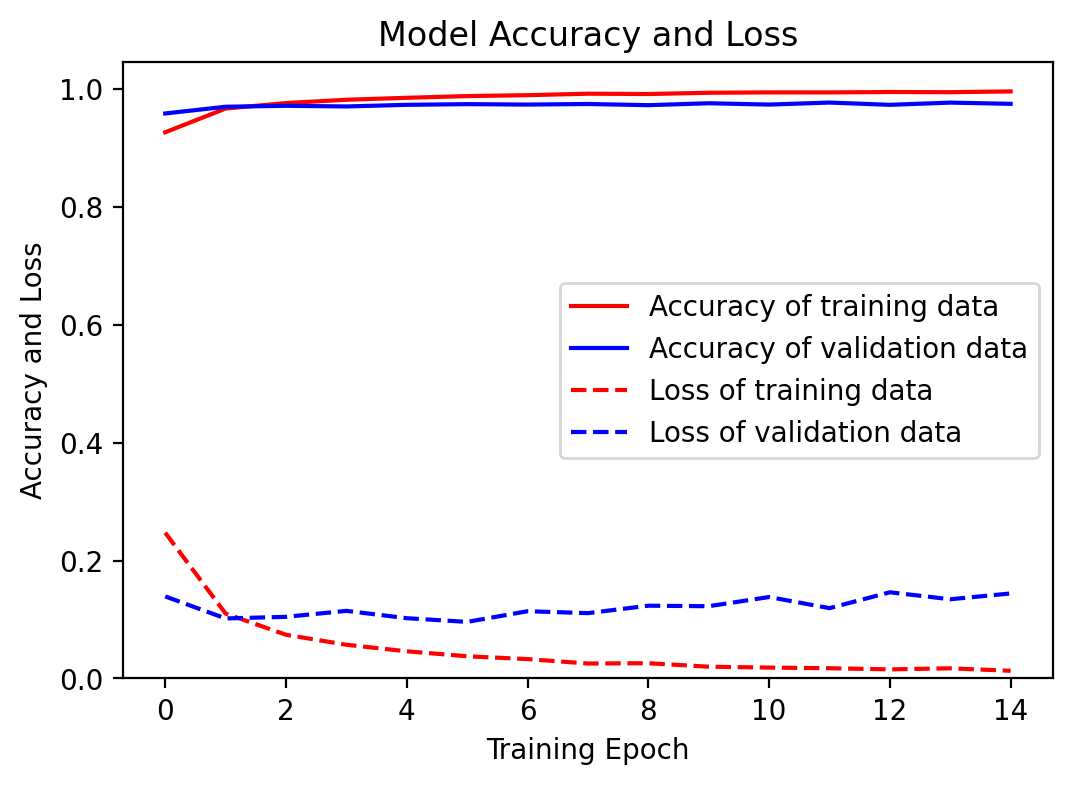

In [16]:
show_4_graphs(h)

## 성능 평가
- 검증데이터에 대한 평가는 evaluate()로 수행한다
- loss와 accuracy를 리턴한다

In [17]:
test_loss, test_acc = model_m.evaluate(X_test, y_test_cat)
print('loss, acc = ',test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1262 - accuracy: 0.9763
loss, acc =  0.12620161473751068 0.9763000011444092


##  예측에 사용하기
- predict()함수를 호출하면 클래스 확률을 보여준다
- 10개의 클래스 확률중에 어떤 클래스의 확률이 가장 큰지는 agrmax()로 찾는다

In [18]:
model_m.predict(X_train[0:3])

1/1 [==============================] - 0s 71ms/step


array([[9.6741753e-28, 7.5162668e-18, 1.1477957e-17, 1.9422335e-04,
        1.2472462e-26, 9.9980575e-01, 3.3885531e-28, 1.8414593e-14,
        7.6802944e-16, 2.1555342e-14],
       [1.0000000e+00, 1.7288296e-20, 5.1600878e-14, 2.3989917e-17,
        3.7603152e-19, 2.5055706e-18, 1.9952998e-18, 1.6575364e-16,
        1.1601695e-17, 7.1211551e-15],
       [1.7137611e-19, 5.9756904e-17, 2.3846015e-11, 7.4708491e-16,
        1.0000000e+00, 9.7738097e-20, 5.0508559e-20, 2.3325888e-12,
        2.9186587e-13, 2.3259372e-09]], dtype=float32)

In [19]:
np.argmax(model_m.predict(X_train[0:5]), axis=1)

1/1 [==============================] - 0s 19ms/step


array([5, 0, 4, 1, 9], dtype=int64)

# CNN 모델
- CNN은 입력으로 4차원 구조를 필요로 한다
 - (샘플수, 가로, 세로, 특성수)
- 구조를 맞추기 위해서 reshape를 사용한다
- [CNN 모델을 사용한 MNIST 인식](https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9) 

In [20]:
X_train_cnn = train_images.reshape(-1,28,28,1)
X_test_cnn = test_images.reshape(-1,28,28,1)

In [21]:
from keras import layers
from keras import models

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3,3), padding="same", activation='relu', input_shape = (28, 28,1)))
model_cnn.add(layers.MaxPooling2D((2,2)))

model_cnn.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.summary()   

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [22]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

model_cnn.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
# 다른 최적화 알고리즘 'rmsprop'
# 레이블로 원 핫 인코딩을 사용해야 한다
h = model_cnn.fit(X_train_cnn,
                      y_train_cat,
                      batch_size=20,
                      epochs=30,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/30
2400/2400 [==============================] - 38s 15ms/step - loss: 0.3036 - accuracy: 0.9499 - val_loss: 0.0765 - val_accuracy: 0.9759
Epoch 2/30
2400/2400 [==============================] - 35s 15ms/step - loss: 0.0696 - accuracy: 0.9790 - val_loss: 0.0588 - val_accuracy: 0.9833
Epoch 3/30
2400/2400 [==============================] - 41s 17ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0679 - val_accuracy: 0.9806
Epoch 4/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0651 - val_accuracy: 0.9843
Epoch 5/30
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0715 - val_accuracy: 0.9826
Epoch 6/30
2400/2400 [==============================] - 39s 16ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0700 - val_accuracy: 0.9836
Epoch 7/30
2400/2400 [==============================] - 40s 17ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0739 -

In [23]:
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0712 - accuracy: 0.9847
test_acc =  0.9847000241279602


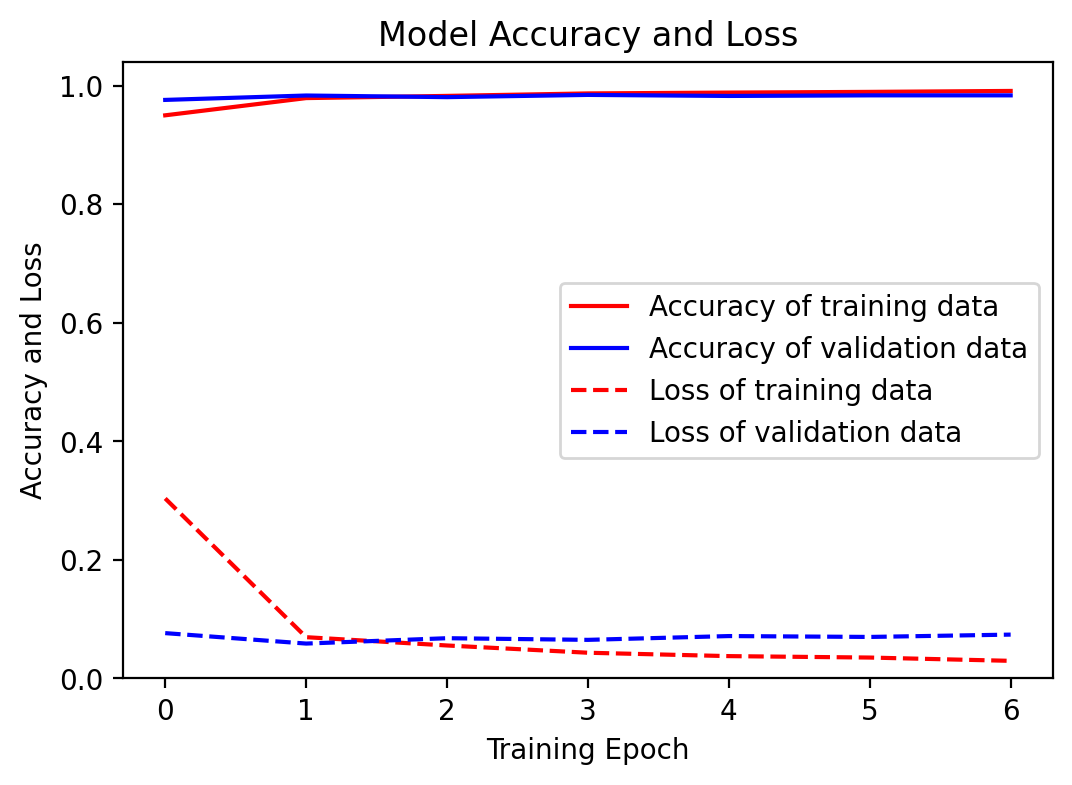

In [24]:
show_4_graphs(h)

# 신경망을 이용한  회귀 예측
- 신경망의 출력단을 다음과 같이 작성하면 회귀예측 모델이 된다 (softmax를 호출하면 분류 모델이다)
  - model.add(layers.Dense(1))
- 목적 변수 2개를 예측하는 경우
  - model.add(layers.Dense(2))

# (실습) 모델 최소화

- 정확도가 96% 이상이 되는 모델을 만들되 가능하면 간단한 모델, 즉, 파라미터수가 가능한 적은 모델을 만드시오